In [1]:
import netCDF4
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

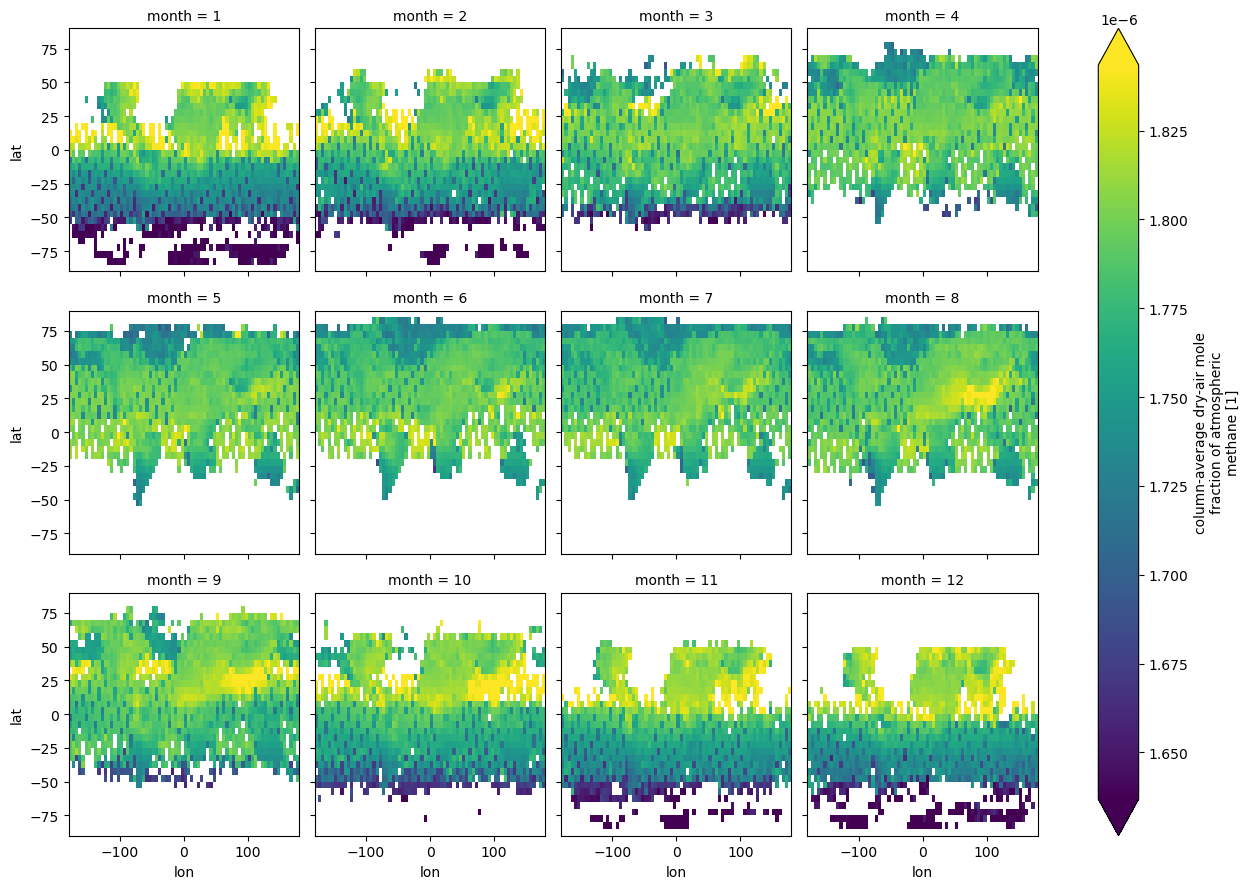

In [7]:
#1.1
# Open a netCDF4 file
ds = xr.open_dataset('200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc', engine="netcdf4")#读取数据

methane_clim = ds.xch4.groupby('time.month').mean()#按月份分组，求平均

methane_clim.plot(col="month", col_wrap=4, robust=True)
# 调整子图间

# 显示图
plt.show()


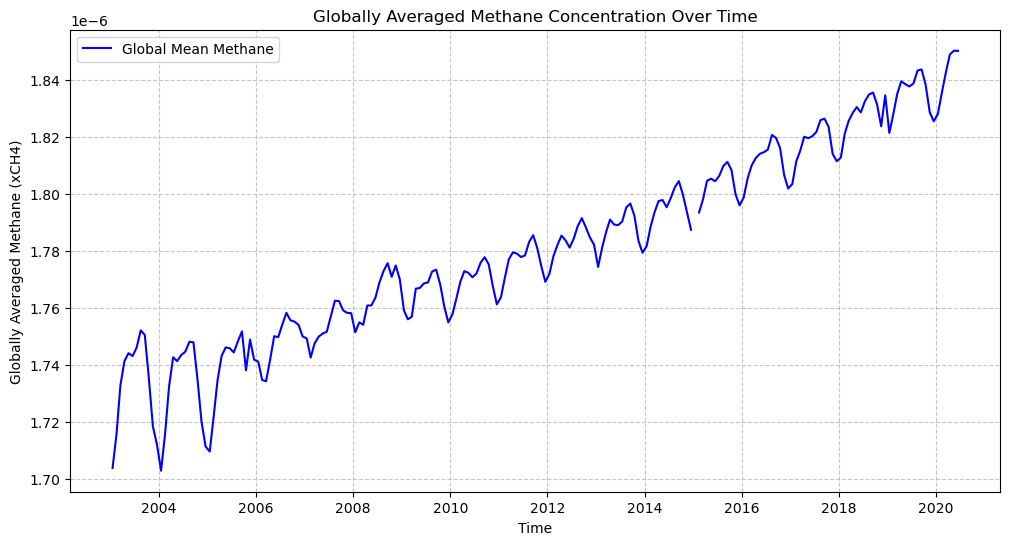

In [172]:
import matplotlib.pyplot as plt

# 计算全球平均甲烷浓度
methane_globalmean = ds.xch4.mean(dim=['lat', 'lon'])  # 沿纬度和经度求平均

# 绘制时间序列图
plt.figure(figsize=(12, 6))  # 设置图表大小
plt.plot(methane_globalmean.time, methane_globalmean, color='blue', label='Global Mean Methane')

# 添加图例和轴标签
plt.xlabel("Time")  # 设置横坐标标签
plt.ylabel("Globally Averaged Methane (xCH4)")  # 设置纵坐标标签
plt.title("Globally Averaged Methane Concentration Over Time")  # 添加标题

# 美化网格和图例
plt.grid(True, linestyle='--', alpha=0.7)  # 添加网格
plt.legend()  # 添加图例

# 显示图表
plt.show()

#可以看出每一年的1月到8月甲烷浓度上升，8月到次年1月甲烷浓度降低。整体甲烷浓度趋势是逐年上升。

Text(0.5, 1.0, 'Deseasonalized methane levels at point [15°S, 150°W] Over Time')

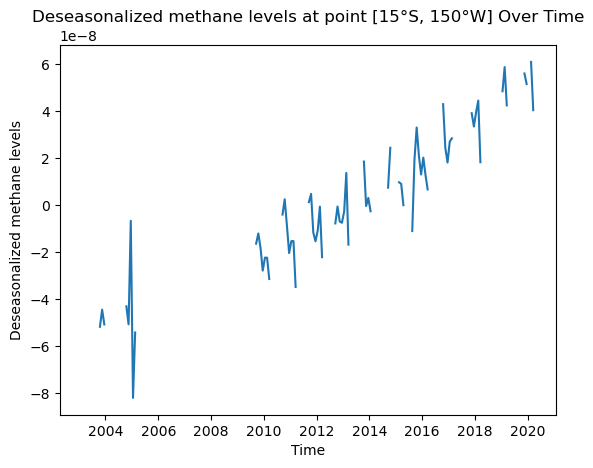

In [264]:
#1.3
methane_group = ds.xch4.groupby('time.month')#按月份分组
methane_desean = methane_group - methane_group.mean() #每个月减去气候态得到去季节化数据
plt.plot(methane_desean.time,methane_desean.sel(lat= -15,lon= -150,method='nearest'))#绘图
# 添加图例和轴标签
plt.xlabel("Time")  # 设置横坐标标签
plt.ylabel("Deseasonalized methane levels")  # 设置纵坐标标签
plt.title("Deseasonalized methane levels at point [15°S, 150°W] Over Time")  # 添加标题
#methane_desean.sel(time='2007',lat= -15,lon= -150,method='nearest')

#发现在2013年之前是下降的，2013年之后是上升的

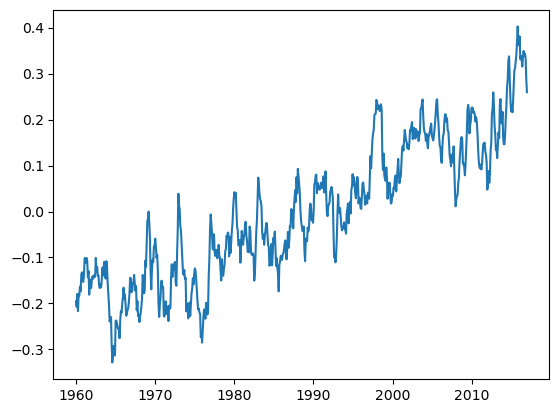

In [382]:
#2.1
SeaTemperature = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc', engine="netcdf4").sst  #读取数据,变量为sst
AverageSeaTemperature = SeaTemperature.mean(dim=['lat', 'lon']) #计算这个区域的平均海面温度

AverageSeaTemperature_clim =AverageSeaTemperature.groupby('time.month').mean()   #平均温度的气候态
AverageSeaTemperature_anom = AverageSeaTemperature.groupby('time.month')-AverageSeaTemperature_clim  #每个月的平均温度减去气候态
plt.plot(AverageSeaTemperature_anom.time,AverageSeaTemperature_anom)

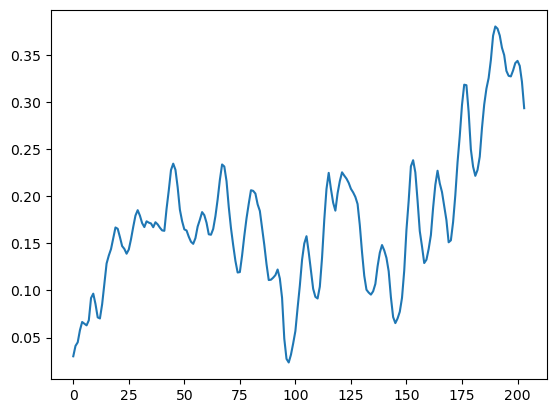

In [378]:
#2.2
running_mean_3month = AverageSeaTemperature_anom.rolling(time=3).mean() #三个月的滑动平均
plt.plot(running_mean_3month.sel(time=slice('2000','2020')))        
#发现去季节性的数据偏差没有超过0.5℃的，所以没有厄尔尼诺。可能是计算方式错误？
#我是先计算了整个经纬度区域的平均值，然后再按月份分组计算每个月的气候态，然后减去气候态得到去季节性数据，然后求三个月滑动平均。

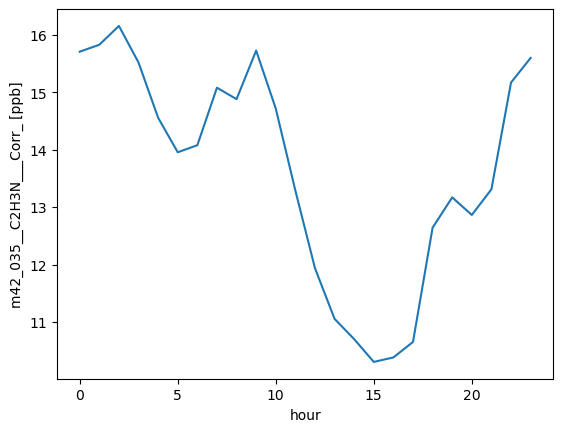

In [55]:
#3.1
ds = xr.open_dataset('vocdata.nc', engine="netcdf4")   #室内voc，臭氧的浓度随时间的数据。时间分辨率是1分钟
clim_C2H3N=ds.m42_035__C2H3N___Corr_.groupby('time.hour').mean() #因为我的数据的分辨率是1分钟，不是一月。而且时间范围只有几天，所以按照小时分组求气候态
clim_C2H3N.plot()
#可以看出C2H3N在一天中9点-15点下降，15点之后上升。

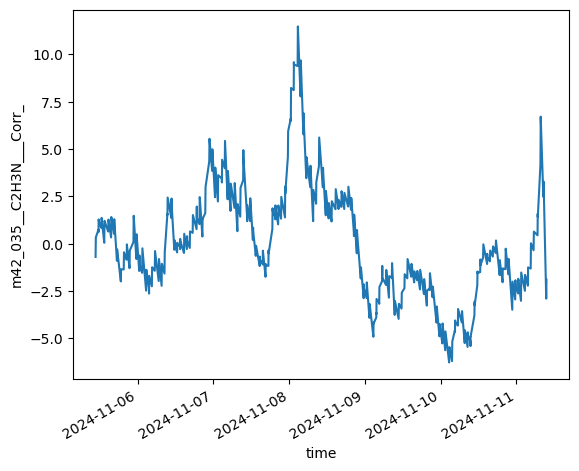

In [65]:
#3.2
#plot1:C2H3N去季节性数据图
anom_C2H3N = ds.m42_035__C2H3N___Corr_.groupby('time.hour')-clim_C2H3N
anom_C2H3N.plot()


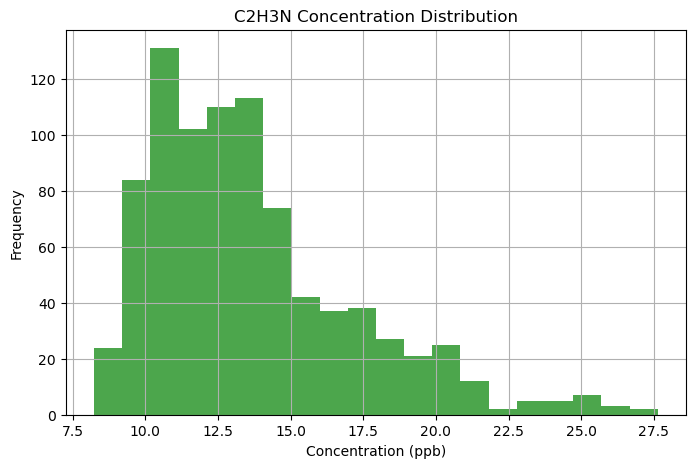

In [71]:
#plot2：浓度频率直方图
ds['m42_035__C2H3N___Corr_'].plot.hist(bins=20, alpha=0.7, color='green', figsize=(8, 5))

plt.title('C2H3N Concentration Distribution')
plt.xlabel('Concentration (ppb)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

C:\Users\86152\AppData\Local\Temp\ipykernel_16676\1572730054.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ds['m42_035__C2H3N___Corr_'].values, shade=True, color="orange")


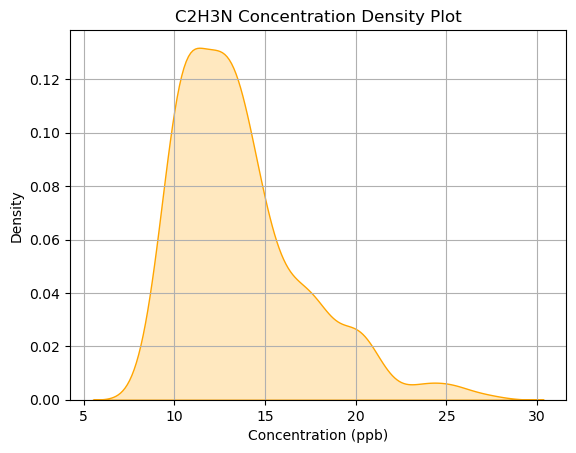

In [75]:
#plot3：密度图
import seaborn as sns
sns.kdeplot(ds['m42_035__C2H3N___Corr_'].values, shade=True, color="orange")

plt.title('C2H3N Concentration Density Plot')
plt.xlabel('Concentration (ppb)')
plt.grid()
plt.show()

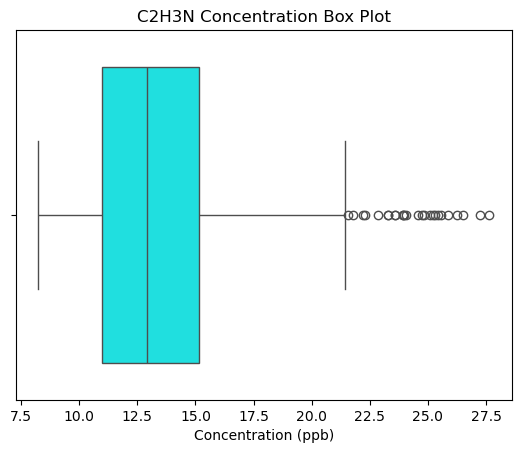

In [77]:
#plot4：箱式图
sns.boxplot(x=ds['m42_035__C2H3N___Corr_'].values, color='cyan')

plt.title('C2H3N Concentration Box Plot')
plt.xlabel('Concentration (ppb)')
plt.show()

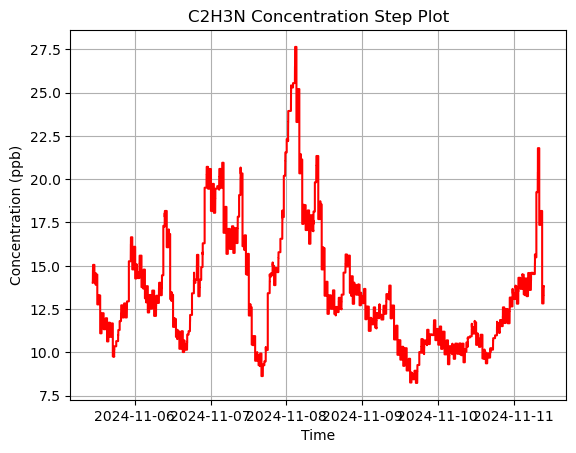

In [79]:
#plot5：阶梯图
plt.step(ds['time'], ds['m42_035__C2H3N___Corr_'], color='red', where='mid')

plt.title('C2H3N Concentration Step Plot')
plt.xlabel('Time')
plt.ylabel('Concentration (ppb)')
plt.grid()
plt.show()